## <font color = 'maroon'>Assignment: Lab-08</font>

The first two questions are coding exercises; question 3 does not require you to write any code.

The supplementary material for this week contains offline copies of the assignment material in case there are internet connectivity issues with School websites. The supplementary material includes file "income_table.html" (for Question 1), file "programmes.html" (for Question 2), and file "Question-3-Graph.png" (for Question 3).

1. You are provided with the following URL: [http://eecs.qmul.ac.uk/~emmanouilb/income_table.html](http://eecs.qmul.ac.uk/~emmanouilb/income_table.html). This webpage includes a table on individuals' income and shopping habits - the same that was used in the Week 3 lab.

A.  Inspect the HTML code of the above URL, and provide a short report on the various tags present in the code. What is the function of each unique tag present in the HTML code? [0.5 marks out of 5]

| $tags$            | $functions$                                                |
|-                  | ---------------------------------------------------        |
|`<!DOCTYPE>`       | This tag is used to specify the version of HTML. `<!DOCTYPE html>` is HTML 5 doctype declaration |
|`<html>....</html>`| It tells the browser that the document is an HTML document |
|`<head>....</head>`| Used as a container for metadata. Metadata defines the document title, character set, styles, links, scripts, and other meta information. Not defined for the URL in question  |
|`<body>` |The tag defines the document's body|
|`<h1>`|indicates a heading on a website. This should represent the main heading/subject for the whole page. There are h1 through h6 headings available in html with h6 highlighting the least important heading|
|`<p>`|defines a paragraph|
|`<table>`|defines an HTML table|
|`<thead>`|used to group header content in an HTML table.Used in conjunction with the tbody and tfoot elements to specify each part of a table (header, body, footer)|
|`<tr>`|Each table row is defined with the tag|
|`<th>`|Each table header is defined with the tag|
|`<tbody>`|Used to group the body content in an HTML table|
|`<td>`|Each table data/cell is defined with the tag|

  B.  Using Beautiful Soup, scrape the table and convert it into a pandas dataframe. Perform data cleaning when necessary to remove extra characters (no need to handle missing values). In the report include the code that was used to scrape and convert the table and provide evidence that the table has been successfully scraped and converted (e.g. by displaying the contents of the dataframe). [1 mark out of 5]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
rows = soup.find_all('tr')

# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
header_list.append(cleantext_header) # Add the clean table header to the list

# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()  # extract the text without HTML tags
    table_list.append(row_cleantext)  # Add the clean table row to the list

df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',', expand=True)
df_header2.head()

df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)

# Remove uneccesary characters
df_table2[0] = df_table2[0].str.strip('[')
df_table2[0] = df_table2[0].str.strip(']')
df_table2[3] = df_table2[3].str.strip('[')
df_table2[3] = df_table2[3].str.strip(']')

# Remove all rows with any missing values
df_table3 = df_table2.dropna(axis=0, how='any')

# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[3] = df_header2[3].str.strip(']')

# We concatenate the two dataframes
frames = [df_header2, df_table3]
df = pd.concat(frames)

df2 = df.rename(columns=df.iloc[0]) # We assign the first row to be the dataframe header
df3 = df2.drop(df2.index[0]) # We drop the replicated header from the first row of the dataframe
df3.head(10)

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


2. The list of the various MSc programmes offered by the School of EECS is provided at the following URL: [http://eecs.qmul.ac.uk/postgraduate/programmes/](http://eecs.qmul.ac.uk/postgraduate/programmes/). Perform web scraping on the table present in the above URL and convert it into a pandas dataframe that would include one row for each programme of study as shown in the webpage. The dataframe should include the following 5 columns: name of postgraduate degree programme (e.g. Advanced Electronic and Electrical Engineering), programme code for part-time study (e.g. H60C), programme code for full-time study (e.g. H60A), URL for part-time study programme details, URL for full-time study programme details. Perform data cleaning to remove unecessary characters when needed. In the report include the code that was used to scrape, convert and clean the table and provide evidence that the table has been successfully scraped (e.g. by displaying the contents of the dataframe). [1 mark out of 5]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

table_list = []
heading_list= []
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

header = soup.find("table", id = "PGCourse").thead.tr
for h in header:
    headings=h.get_text()
    heading_list.append(headings)
    
df_table = pd.DataFrame(heading_list)
df_table= df_table.transpose()

book_urls = soup.find("table", id = "PGCourse").tbody.get_text()
my=book_urls.split("\n\n")
dfl=pd.DataFrame(my[1:16])
dfl[0] = dfl[0].str.strip('\n')
dfm = dfl[0].str.split('\n', expand=True)
dfm.index=dfm.index+1
dfm

frames = [df_table, dfm]
df = pd.concat(frames)
df2 = df.rename(columns=df.iloc[0]) # We assign the first row to be the dataframe header
df3 = df2.drop(df2.index[0]) # We drop the replicated header from the first row of the dataframe
df3.head(15)

row_td = soup.find_all("td", style="text-align: center;") # the 'td' tag in html code denotes a table cell
for m in row_td:
    try:
        df3.loc[df3['Part-time(2 year)'] == m.get_text(), 'PT study programme details - URL'] = m.a.get("href")
        df3.loc[df3['Full-time(1 year)'] == m.get_text(), 'FT study programme details - URL'] = m.a.get("href")
    except:
        pass
pd.options.display.max_colwidth = 200
df3.fillna("")

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year),PT study programme details - URL,FT study programme details - URL
1,Advanced Electronic and Electrical Engineering,H60C,H60A,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/
2,Artificial Intelligence,I4U2,I4U1,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/
3,Big Data Science,H6J6,H6J7,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/big-data-science-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/big-data-science-msc/
4,Computer Games,,I4U4,,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-games-msc/
5,Computer Science,G4U2,G4U1,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-science-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-science-msc/
6,Computer Science by Research,G4Q2,G4Q1,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-science-by-research-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-science-by-research-msc/
7,Computing and Information Systems,G5U6,G5U5,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computing-and-information-systems-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computing-and-information-systems-msc/
8,Data Science and Artificial Intelligence by Conversion,,I4U5,,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/data-science-and-artificial-intelligence-msc/
9,Electronic Engineering by Research,H6T6,H6T5,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/electronic-engineering-by-research-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/electronic-engineering-by-research-msc/
10,Internet of Things (Data),I1T2,I1T0,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/internet-of-things-data-msc/,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/internet-of-things-data-msc/


3. Consider the graph in the figure below as displaying the links for a group of 5 webpages.


A. Which of the 5 nodes would you consider hubs and which would you consider authorities? Explain why. [0.5 marks out of 5]

* **Nodes 1, 2** are considered as the Authorities (Authorities have more inlinks).
* **Nodes 3, 4, 5** are considered as Hubs (Hubs have more outlinks).

B. Assume that this graph is to be used as input to the PageRank algorithm. Calculate the transition probabilities $p_{ij}$ for all 5 nodes in the below graph (where $i$ and $j$ take values between 1 to 5). Add transitions with a uniform probability distribution in the case of dead-end nodes (do not consider cases of dead-end components). [1 mark out of 5].

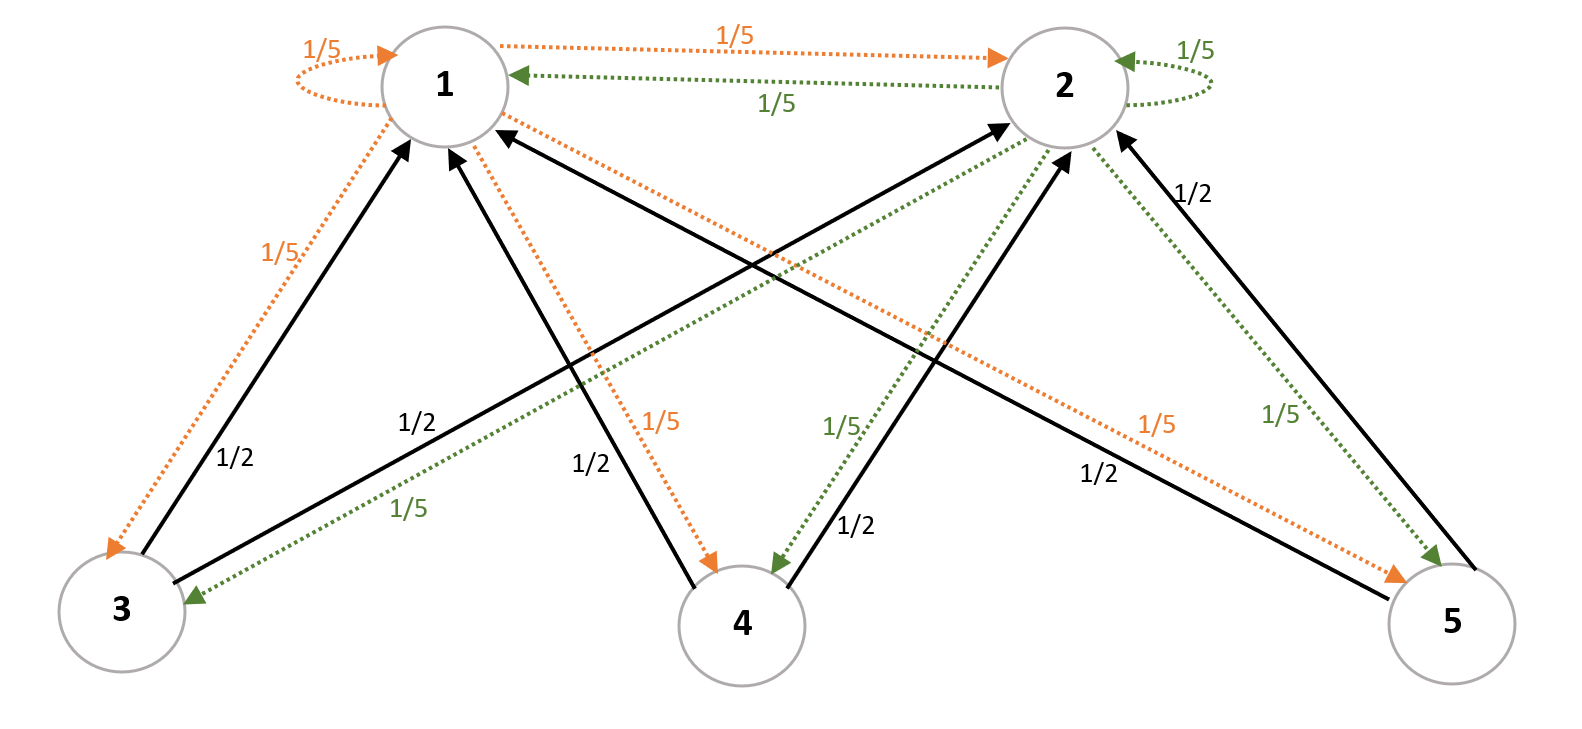

$$\begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$

C. Derive the PageRank $\pi(i)$ for all nodes, where $i=\{1,...,5\}$ corresponds to the node index. Assume that the teleportation probability is set to $\alpha$. [1 mark out of 5]

$\pi(i) = \frac{\alpha}{n} + (1 - \alpha)\sum_{j  \epsilon  ln(i)} \pi(j).p_{ji}$

Page Rank for node 1:  $ \pi(1) = \frac{\alpha}{5}  + (1 - \alpha).(\frac{\pi(1)}{5} + \frac{\pi(2)}{5} + \frac{\pi(3)}{2} + \frac{\pi(4)}{2} + \frac{\pi(5)}{2})$


Page Rank for node 2:  $ \pi(2) = \frac{\alpha}{5}  + (1 - \alpha).(\frac{\pi(1)}{5} + \frac{\pi(2)}{5} + \frac{\pi(3)}{2} + \frac{\pi(4)}{2} + \frac{\pi(5)}{2})$


Page Rank for node 3:  $ \pi(3) = \frac{\alpha}{5}  + (1 - \alpha).(\frac{\pi(1)}{5} + \frac{\pi(2)}{5})$


Page Rank for node 4:  $ \pi(4) = \frac{\alpha}{5}  + (1 - \alpha).(\frac{\pi(1)}{5} + \frac{\pi(2)}{5})$


Page Rank for node 5:  $ \pi(5) = \frac{\alpha}{5}  + (1 - \alpha).(\frac{\pi(1)}{5} + \frac{\pi(2)}{5})$

## <font color = 'maroon'>Assignment: Lab-09</font>

Questions 1-3 are pen-and-paper exercises; questions 4-6 are coding exercises. For all your answers please show your workings (equations or code when applicable).

1. Consider the following sentences related to data mining theory, and assume that each of the below sentences corresponds to a document $d$:
    * Data refers to characteristics that are collected through observation.
    * A dataset can be viewed as a collection of objects.
    * Data objects are described by a number of attributes.
    * An attribute is a characteristic or feature of an object.

A. Construct and display the document-term matrix for the above documents. Remove all stop words (here consider as stop words: articles, prepositions, conjunctions, pronouns, and common verbs) and punctuation marks; convert any plural nouns/adjectives to their singular form; and convert verbs to the present tense and first person singular form, before you construct the matrix. [1 mark out of 5]


##### Step1
Let,

d1 = Data refers to characteristics that are collected through observation.

d2 = A dataset can be viewed as a collection of objects.

d3 = Data objects are described by a number of attributes.

d4 = An attribute is a characteristic or feature of an object.

##### Step 2
##### Removing all stopwords:

Articles -> the, a, an

Common verbs -> be, are, is, can

Conjunctions (and subordinating conjuctions) - or, as

Prepositions -> of, to, by, through

Pronouns -> that

Now,

d1 = data refers characteristics collected observation

d2 = dataset viewed collection objects

d3 = data objects described number attributes

d4 = attribute characteristic feature object

##### Step 3
##### Converting plural nouns/adjectives to singular form:
##### Converting verbs to present tense and first person singular

refers -> refer

characteristics -> characteristic

viewed -> view

collections -> collect

objects -> object

described -> describe 

attributes -> attribute

Now, 

d1 = data refer characteristic collect observation

d2 = dataset view collection object

d3 = data object describe number attribute

d4 = attribute characteristic feature object

##### Step 4
##### Document-term matrix

|word ||d1||d2||d3||d4|
|:-||:-:||:-:||:-:||:-:|
|data            |1||0||1||0|
|refer           |1||0||0||0|
|characteristic  |1||0||0||1|
|collect         |1||1||0||0|
|collection      |0||1||0||0|
|observation     |1||0||0||0|
|dataset         |0||1||0||0|
|view            |0||1||0||0|
|object          |0||1||1||1|
|describe        |0||0||1||0|
|number          |0||0||1||0|
|attribute       |0||0||1||1|
|feature         |0||0||0||1|

B  . Using the above constructed document-term matrix, calculate the inverse document frequency $\mathit{idf}(w)$ for all words $w$ you have identified from question 1(a). [0.5 marks out of 5]


|word ||document frequency|| inverse document frequency|
|:-||:--:||:--:|
|data            |2||0.30|
|refer           |1||0.60|
|characteristic  |2||0.30|
|collect         |1||0.60|
|collection      |1||0.60|
|observation     |1||0.60|
|dataset         |1||0.60|
|view            |1||0.60|
|object          |3||0.12|
|describe        |1||0.60|
|number          |1||0.60|
|attribute       |2||0.30|
|feature         |1||0.60|

2. Consider a timeseries $y$ were we have obtained values of the timeseries for the following times $t$, as shown in the below table. Using linear interpolation, calculate the values $y$ of the timeseries for times $t = 3$ and $t=5$. [0.5 marks out of 5]

| $t$  | 1  | 4  | 6  |
|-|-|-|-|
| $y$  | 2  | 8  | 5  |

For t = 3

$t_{i} = 1$

$t_{j} = 4$

$y_{i} = 2$

$y_{j} = 8$ 
   
$y = 2 + (\frac{3-1}{4-1})*(8-2)$

$y = 2 + (\frac{2}{3})*6$

$y = 2+4= 6$

> $y= 6$

For t = 5

$t_{i} = 4$

$t_{j} = 6$

$y_{i} = 8$

$y_{j} = 5$ 

$y = 8 + (\frac{5-4}{6-4})*(5-8)$

$y = 8 + (\frac{1}{2})*(-3)$

$y = 8 - 3.5$

> $y = 6.5$

3. Consider the following timeseries $y = \{0.1, 0.15, 0.2, 0.2, 0.3, 0.4, 0.25, 0.6, 0.5\}$. Perform binning on the timeseries using $k=3$ values per bin, and show the resulting timeseries after binning. [0.5 marks out of 5]

$y = \{0.1, 0.15, 0.2, 0.2, 0.3, 0.4, 0.25, 0.6, 0.5\}$

$k=3$ 

bin 1 -> $[0.1, 0.15, 0.2]$

bin 2 -> $[0.2, 0.3, 0.4]$

bin 3 -> $[0.25, 0.6, 0.5]$

bin 1 = $\frac{0.1 + 0.15 + 0.2}{3} = \frac{0.45}{3}$

bin 2 = $\frac{0.2 + 0.3 + 0.4}{3} = \frac{0.9}{3}$

bin 3 = $\frac{0.25 + 0.6 + 0.5}{3} = \frac{1.35}{3}$

Resulting Time Series = {$0.15, 0.3, 0.45$}

4. Load CSV file "timeseries.csv", which contains a univariate timeseries. Once loaded, convert the timeseries into a numpy array and use the numpy flatten() function to ensure that the loaded timeseries is one-dimensional. Compute the Discrete Fourier Transform (DFT) of the timeseries, and display plots for both the original timeseries and the magnitude of its DFT. How many predominant frequency components does the timeseries have? [1 mark out of 5]

In [3]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the csv file which is a dataframe
time = pd.read_csv('timeseries.csv')
time.head()

,0.000000000000000000e+00
0,0.049068
1,0.098017
2,0.146730
3,0.195090
4,0.242980


In [4]:
#dataframe is converted into the array
d= np.array(time)
display(d)

array([[ 0.04906767],
       [ 0.09801714],
       [ 0.14673047],
       ...,
       [-0.47009127],
       [-0.32997772],
       [-0.17008613]])

In [5]:
#use flatten function to ensure that the loaded timeseries is one-dimensional
a= d.flatten()
print(a)

[ 0.04906767  0.09801714  0.14673047 ... -0.47009127 -0.32997772
 -0.17008613]


Text(0.5, 0, 'Frequency (index $k$)')

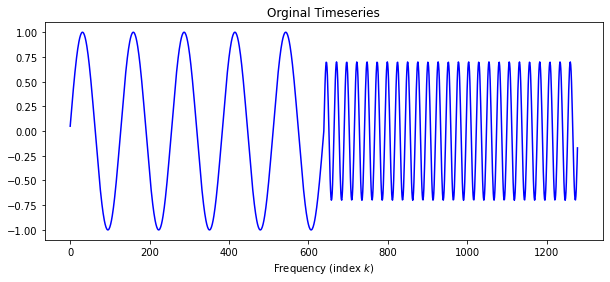

In [6]:
#Plotting of orginal timeseries
plt.figure(figsize=(10, 4))
plt.title('Orginal Timeseries')
plt.plot(a, color="blue")
plt.xlabel('Frequency (index $k$)')

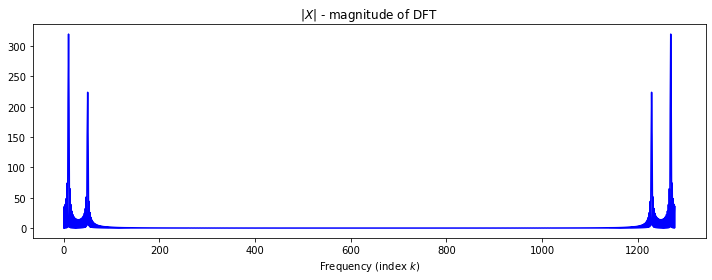

In [7]:
#numpy implementation of DFT
Xfft = np.fft.fft(a)
#Plot after implementing DFT
plt.figure(figsize=(10, 4))
plt.title('$|X|$ - magnitude of DFT')
plt.plot(np.abs(Xfft), color="blue")
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

5. Using the daily births dataset from this lab tutorial, smooth the timeseries using trailing moving average smoothing and a window size that corresponds to one week; then replace any NaN values with zeros. Perform timeseries forecasting using the smoothed dataset in order to predict daily births for the first 5 days of 1960, using the models below. Show your forecasting results. [0.75 marks out of 5]
    * AR model with $p=2$
    * ARMA model with $p=2$ and $q=2$

In [8]:
import warnings
from pandas import read_csv
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [9]:
series = read_csv('births.csv', header=0, index_col=0)
print(series.head())

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


<AxesSubplot:title={'center':'original births'}, xlabel='Date'>

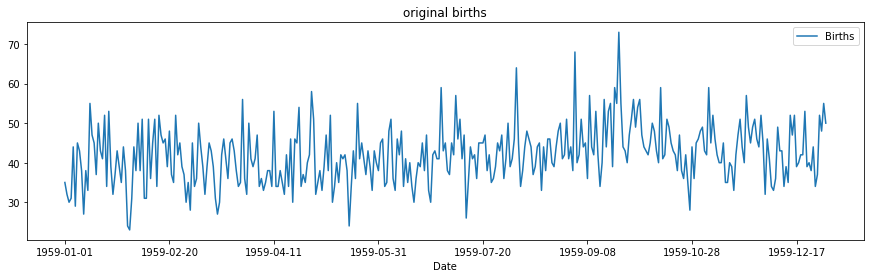

In [10]:
#plot original dataset
series.plot(figsize=(15,4),title='original births')

In [11]:
#Perform trailing moving average smoothing
#using a window of 7 samples 
#i.e., because question denotes window size corresponds to one week
rolling = series.rolling(window=7) 
rolling_mean = rolling.mean()
print(rolling_mean.head())

            Births
Date              
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04     NaN
1959-01-05     NaN


<AxesSubplot:title={'center':'smoothened births'}, xlabel='Date'>

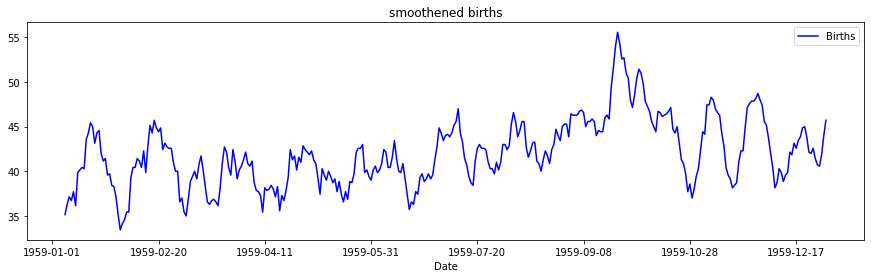

In [12]:
#plot smoothened dataset
rolling_mean.plot(color='blue', figsize=(15,4),title='smoothened births')

In [13]:
#replacing NaN with 0
d=rolling_mean.replace(np.nan,0)
print(d.head())

            Births
Date              
1959-01-01     0.0
1959-01-02     0.0
1959-01-03     0.0
1959-01-04     0.0
1959-01-05     0.0


<AxesSubplot:title={'center':'smoothened births'}, xlabel='Date'>

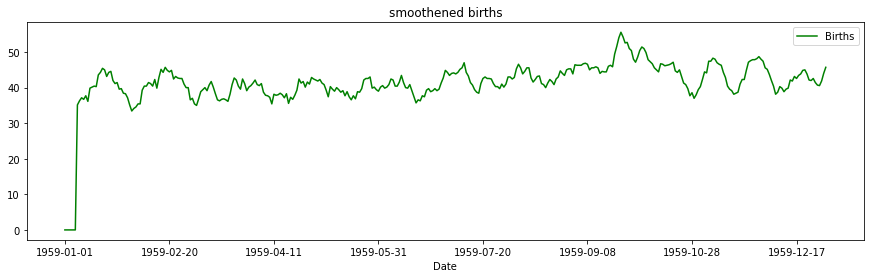

In [14]:
#plot transformed(smoothened) dataset(after replace NaN with 0)
d.plot(color='green', figsize=(15,4),title='smoothened births')

In [15]:
#Fit Autoregressive model
#"lags" indicates the model order
#for AR model with p=2
model = AutoReg(d, lags=2,old_names=False) 
model_fit = model.fit()

#Make prediction
#arguments denote which dataset indices to predict
yhat = model_fit.predict(len(d), len(d)+4) 
print(yhat)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


In [16]:
#Fit ARMA model
#for ARMA model with p=2 and q=2
model = ARIMA(d, order=(2, 0, 2)) 
model_fit = model.fit()

#Make prediction
#arguments denote which dataset indices to predict
yhat = model_fit.predict(len(d), len(d)+4) 
print(yhat)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1960-01-01    45.810252
1960-01-02    45.818773
1960-01-03    45.728102
1960-01-04    45.564028
1960-01-05    45.347319
Freq: D, Name: predicted_mean, dtype: float64


6. Using a similar process used in section 1 of this lab notebook, perform document clustering using k-means on the following wikipedia articles: supervised learning, unsupervised learning, semi-supervised learning, association rule learning, anomaly detection, cluster analysis, dimensionality reduction, regression analysis, statistical classification, data mining, data warehouse, online analytical processing. As with section 1, use the elbow metric to find an appropriate number of clusters. Discuss and display the document clustering results. [0.75 marks out of 5]

In [17]:
#libraries Imported
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
#loading the lsit of titles in wikipedia to a list and stored in a variable
articles=['supervised learning', 'unsupervised learning', 
          'semi-supervised learning', 'association rule learning', 
          'anomaly detection', 'cluster analysis', 'dimensionality reduction', 
          'regression analysis', 'statistical classification', 'data mining', 
          'data warehouse', 'online analytical processing']

# Create an two empty lists 
wiki_lst=[]
title=[]

# \Load wikipedia articles
#The content of each Wikipedia article is stored in variable 'wiki_lst' 
#The title of each article will be stored in variable 'title'.
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)

loading content:  supervised learning
loading content:  unsupervised learning
loading content:  semi-supervised learning
loading content:  association rule learning
loading content:  anomaly detection
loading content:  cluster analysis
loading content:  dimensionality reduction
loading content:  regression analysis
loading content:  statistical classification
loading content:  data mining
loading content:  data warehouse
loading content:  online analytical processing


In [19]:
#it is recommended that stop words are excluded
vectorizer = TfidfVectorizer(stop_words={'english'})
#Create tf-idf feature of the wikipedia dataset
X = vectorizer.fit_transform(wiki_lst) 
#Print dimensions of tf-idf feature
print(X.shape) 

(12, 4220)


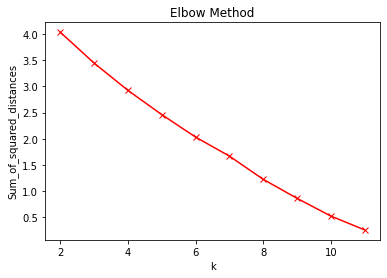

In [37]:
#Elbow method
#calculates the sum of squared distances for various values of k
#here we will use values of k from 2 to 12
Sum_of_squared_distances = []
K = range(2,12)

#create a loop, then use kmeans and fit with the X
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    l = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

#plotting
plt.plot(K, Sum_of_squared_distances, 'bx-', color="red")
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [40]:
#The plot is almost a straight line, probably because we have too few articles. 
#But at a closer examination a small dent appears for k=7. 
#We will therefore try to cluster into 7 groups.
#Fit k-means model with k=7
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

KMeans(max_iter=200, n_clusters=7)

In [41]:
#Print the list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
display(wiki_cl.sort_values(by=['cluster']))

,title,cluster
11,online analytical processing,0
1,unsupervised learning,1
0,supervised learning,2
2,semi-supervised learning,2
7,regression analysis,2
9,data mining,3
10,data warehouse,3
4,anomaly detection,4
5,cluster analysis,5
6,dimensionality reduction,5
